# In this project, I have used the data from kaggle https://www.kaggle.com/datasets/neuromusic/avocado-prices to perform exploratory data analysis and time series price prediction. 


# 1st Part: EDA 

Q1: Are organic avocados more expensive than conventional avocados? 

Q2: How does avocado price change over time?

Q3: Has the price of organic/ conventional avocodo changed?

Q4: How does the price differ based on the region?

# 2nd Part: Prediction 

Avocado price prediction after Feb of 2018


# **<font color='Green'> Importing and Processsing Data </font>**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving Breast Cancer Dataset.csv to Breast Cancer Dataset.csv


In [ ]:
df=pd.read_csv('avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


checking if the column has NA data 

In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Dropping unnecessary column

In [ ]:
df= df.drop('Unnamed: 0', axis=1) 

checking data types

In [ ]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

understanding the column names

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


Date column needs to be date datatype

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

# **<font color='Green'> EDA </font>**

Q1: Are organic avocados more expensive than conventional avocados?

In [ ]:
sns.set_palette('dark')

finding mean of each type

In [ ]:
p_df=df.groupby('type').mean('AveragePrice')
p_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


Assining to a variable to plot 

In [ ]:
con=p_df.loc['conventional']['AveragePrice']
org=p_df.loc['organic']['AveragePrice']

In [ ]:
print("Mean price of conventional avocado is ",con, ". mean price of organic avocado is ",org)

Mean price of conventional avocado is  1.1580396668858208 . mean price of organic avocado is  1.6539986846432095


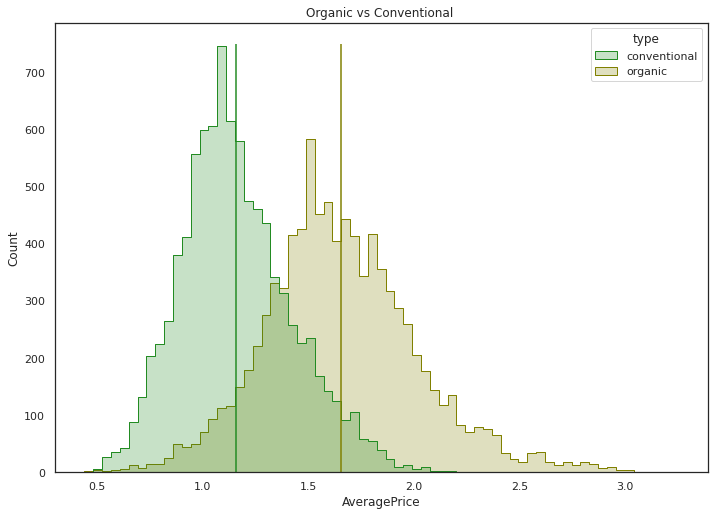

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='white')
sns.histplot(data=df, x='AveragePrice', hue='type', element='step', palette=["forestgreen", "olive"]).set(title='Organic vs Conventional ')
plt.vlines(x=org, ymin = 0, ymax = 750, color='olive')
plt.vlines(x=con, ymin = 0, ymax = 750, color='forestgreen')

# Summary: plot shows price distribution by type (organic vs conventional), each linee shows the mean of type. Generally, organic avocados are more expensive than the conventional avocados. 

Q2: How does avocado price change over time?

In [ ]:
df_time = df.groupby('Date').mean('AveragePrice')

In [ ]:
df_time

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015.0
2015-01-11,1.370648,7.273686e+05,287260.786944,303781.757778,21751.550463,114574.490370,95860.522407,18313.259259,400.708704,2015.0
2015-01-18,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015.0
2015-01-25,1.397130,7.080211e+05,299121.600648,267862.244167,19244.248704,121793.027500,100715.897685,20859.406667,217.723148,2015.0
2015-02-01,1.247037,1.106048e+06,465675.823704,469409.541481,34143.419537,136819.689815,107192.904167,28462.864722,1163.920926,2015.0
...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.359630,1.011402e+06,334272.681667,267146.528056,17937.882870,392024.723519,279950.488796,104767.552315,7306.682407,2018.0
2018-03-04,1.350185,1.035601e+06,348894.357407,292967.505741,14315.347500,379405.846574,285591.463519,87350.231019,6464.152037,2018.0
2018-03-11,1.335093,1.032085e+06,342727.715556,278956.907037,17654.501852,392740.366667,303336.144352,82858.199630,6546.022685,2018.0


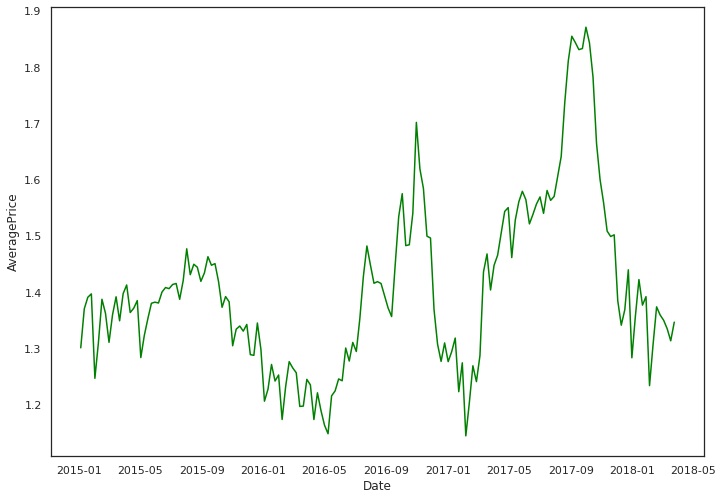

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(data=df_time, x="Date", y="AveragePrice", color='green')

We can see the price change of avocado overtime, prices increases during the summer and decreases during the winter. 
But did the price of organic and coventional avocado change similary? Let's find out!

In [ ]:
df_timebytype= df.groupby(['Date', 'type']).mean('AveragePrice')

In [ ]:
df_timebytype

AveragePrice  Total Volume           4046  \
Date       type                                                      
2015-01-04 conventional      1.009630  1.538052e+06  601242.840926   
           organic           1.592963  2.999144e+04   11687.876481   
2015-01-11 conventional      1.111296  1.421895e+06  561008.763704   
           organic           1.630000  3.284237e+04   13512.810185   
2015-01-18 conventional      1.133519  1.416863e+06  576453.735741   
...                               ...           ...            ...   
2018-03-11 organic           1.533519  8.209018e+04    6371.907407   
2018-03-18 conventional      1.096296  2.022063e+06  656970.947963   
           organic           1.531111  8.301019e+04    8562.277407   
2018-03-25 conventional      1.147222  2.112655e+06  675233.836296   
           organic           1.546481  7.751080e+04    5972.836111   

                                  4225          4770     Total Bags  \
Date       type                                                       
2015-01-04 conventional  671762.802778  41977.973333  223068.224815   
           organic        10663.834815    222.371852    7417.356481   
2015-01-11 conventional  594701.351667  43309.042037  222875.642407   
           organic        12862.163889    194.058889    6273.338333   
2015-01-18 conventional  570980.695185  40690.031296  228738.393148   
...                                ...           ...            ...   
2018-03-11 organic        20469.581667     72.242963   55165.070926   
2018-03-18 conventional  549166.965370  32429.486481  783496.094074   
           organic        22470.735370     52.705926   51910.098333   
2018-03-25 conventional  600100.161481  37811.576667  799509.402963   
           organic        17316.183333     54.835370   54118.291852   

                            Small Bags     Large Bags   XLarge Bags    year  
Date       type                                                              
2015-01-04 conventional  178194.034259   43937.957407    936.233148  2015.0  
           organic         5324.649074    2092.707407      0.000000  2015.0  
2015-01-11 conventional  186732.530000   35341.695000    801.417407  2015.0  
           organic         4988.514815    1284.823519      0.000000  2015.0  
2015-01-18 conventional  190612.723333   37730.401296    395.268519  2015.0  
...                                ...            ...           ...     ...  
2018-03-11 organic        46584.853148    8580.217778      0.000000  2018.0  
2018-03-18 conventional  575598.935370  194786.034259  13111.124444  2018.0  
           organic        41182.691481   10718.034074      9.372778  2018.0  
2018-03-25 conventional  612866.114259  171735.069630  14908.219074  2018.0  
           organic        44747.904630    9362.270556      8.116667  2018.0  

[338 rows x 10 columns]

Q3: Has the price of organic/ conventional avocodo changed?

[Text(0.5, 1.0, 'Organic vs Conventional ')]

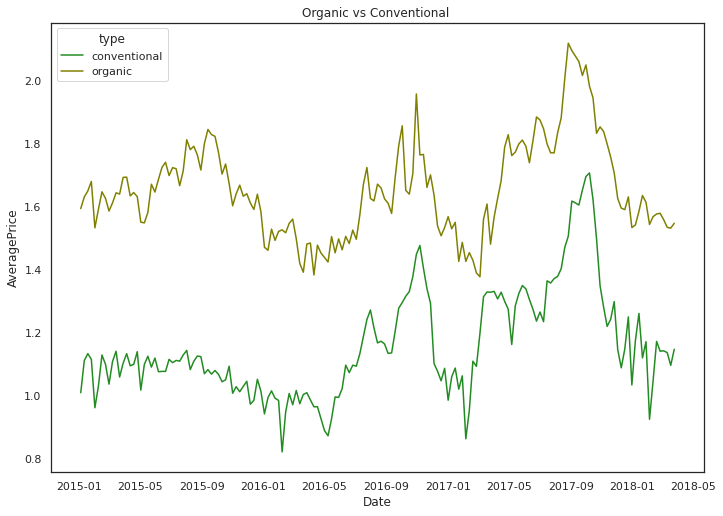

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.lineplot(data=df_timebytype, x="Date", y="AveragePrice", hue='type', palette=["forestgreen", "olive"]).set(title='Organic vs Conventional ')

Summary: Yes, It seems that price trend are consistant for both organic and conventional

Q4: How does the price differ based on the region?

In [ ]:
df_region = df.groupby('region').mean('AveragePrice')

In [ ]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.561036,47537.869734,1824.081775,37621.208254,162.832337,7929.747367,6647.765473,1153.496213,128.488639,2016.147929
Atlanta,1.337959,262145.322041,146116.867959,31218.510385,311.385769,84498.560888,51605.727337,32070.044556,822.786036,2016.147929
BaltimoreWashington,1.534231,398561.891479,35656.218166,245982.888876,12466.730976,104456.053462,100939.683195,2903.984586,612.382722,2016.147929
Boise,1.348136,42642.567308,20019.507604,3461.682367,3186.787840,15974.592456,13840.037249,2103.634083,30.915207,2016.147929
Boston,1.530888,287792.854527,4994.610059,214219.864290,4982.294970,63596.085207,58906.590355,4438.364704,251.124231,2016.147929


In [ ]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

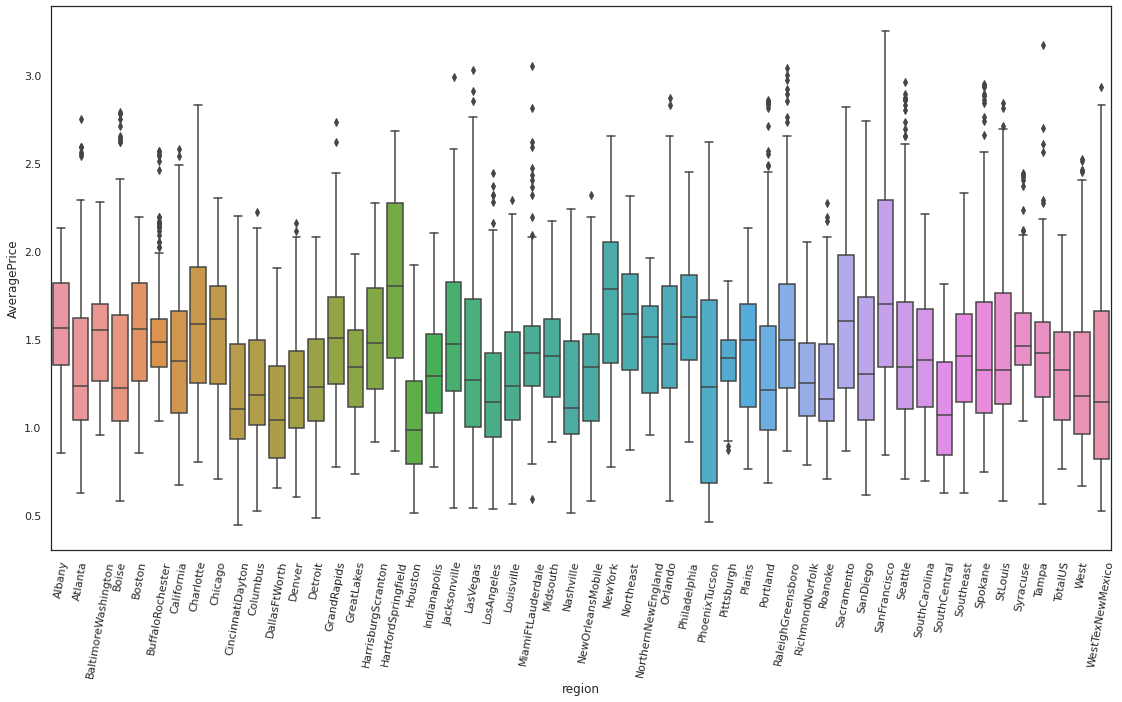

In [ ]:

plt.figure(figsize=(19,10))
sns.boxplot(x=df['region'], y=df['AveragePrice']);
plt.xticks(rotation=80)


black dots are outliers. 

# **<font color='Green'> Prediction </font>**

In [ ]:
df=df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_llvbb9x/xyezy78r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_llvbb9x/wlptg2hs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82328', 'data', 'file=/tmp/tmp_llvbb9x/xyezy78r.json', 'init=/tmp/tmp_llvbb9x/wlptg2hs.json', 'output', 'file=/tmp/tmp_llvbb9x/prophet_modeln3isd41n/prophet_model-20230108013538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:35:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


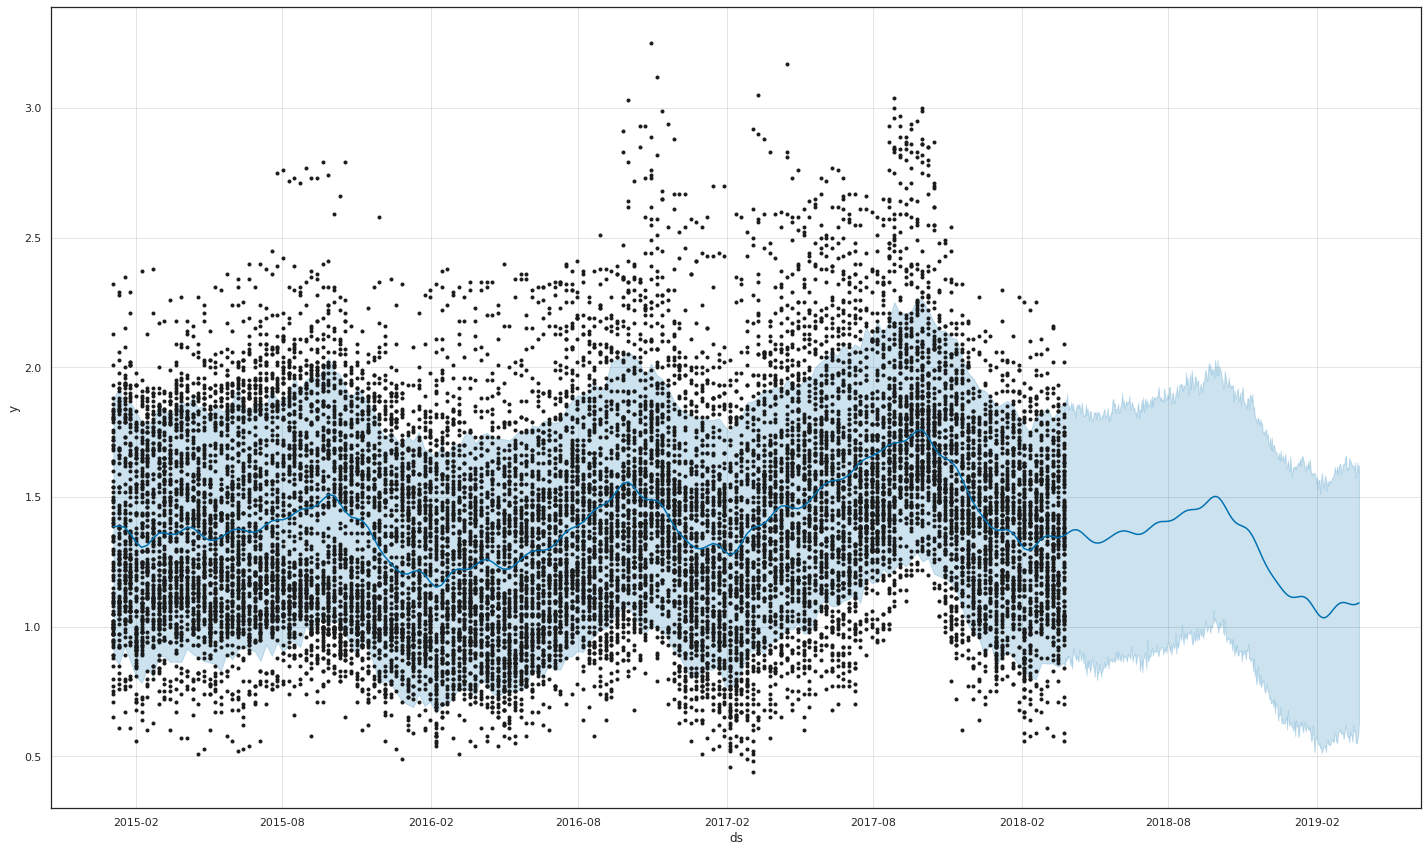

In [ ]:
fig1 = m.plot(forecast, figsize=(20, 12))